# Figure 4: TCC II for Norway
With this jupyter notebook you can generates Figure 3 of:  van der Most et al. Temporally compounding energy droughts in European electricity systems with hydropower

In [1]:
# General packages
import os
from calendar import monthrange
import calendar
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd

# Plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.io.shapereader as shapereader
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import string


# Set matplotlib inline for Jupyter Notebooks
%matplotlib inline

# Update matplotlib parameters
mpl.rcParams.update(mpl.rcParamsDefault)

# Set the font to sans-serif, preferring Helvetica or Arial
mpl.rcParams['font.sans-serif'] = ["Helvetica", "Arial", "sans-serif"]

# Set the default font type to sans-serif
mpl.rcParams['font.family'] = 'sans-serif'

# Set the maximum font size to 7pt
mpl.rcParams['font.size'] = 5
mpl.rcParams['legend.fontsize'] = 5

# Set the font size for axis labels
mpl.rcParams['axes.labelsize'] = 7  # Change this value to your preferred size

# Set the minimum font size for smaller text elements, like tick labels
mpl.rcParams['xtick.labelsize'] = 5
mpl.rcParams['ytick.labelsize'] = 5

# set figure linewidths
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.6
mpl.rcParams['ytick.major.width'] = 0.6
mpl.rcParams['xtick.minor.width'] = 0.4
mpl.rcParams['ytick.minor.width'] = 0.4

## settings

In [2]:

pois = {
       'NOR':(-260,-220),
       }


extension = 1600

## colors to use for the plots
colors_seasons = {
    'winter':'#0000FF',
    'summer': '#ff9412',#'#FFB14E',
    'all':'#E8246F',
}

## open datasets 

In [3]:
# input folder
ifolder = 'data_for_images/'
# energy data
data = pd.read_csv(ifolder+'fig4_events_reservoir_NOR.csv', index_col=0)
demdata = pd.read_csv(ifolder+'fig4_events_demand_NOR.csv', index_col=0)
resdata = pd.read_csv(ifolder+'fig4_events_residual_NOR.csv', index_col=0)
Eindata = pd.read_csv(ifolder+'fig4_events_inflow_NOR.csv', index_col=0)
Eoutdata = pd.read_csv(ifolder+'fig4_events_outflow_NOR.csv', index_col=0)
# climate data
psl = xr.open_dataset(ifolder+'fig4_psl.nc')
tas = xr.open_dataset(ifolder+'fig4_tas.nc')
mrro = xr.open_dataset(ifolder+'fig4_mrro.nc')
# risk ratios
dfhm = pd.read_csv(ifolder + 'rr_winter_after_low_mrro_poi_LENTIS_PD_02_v4.csv',index_col=0)
dfhm = dfhm.drop('CHE')
dfSI = pd.read_csv(ifolder + 'statistical_significant_rr_winter_after_low_mrro_poi_LENTIS_PD_02_v4.csv',index_col=0)
dfSI = dfSI.drop('CHE')

# Main plot

### version 2

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial, sans-serif


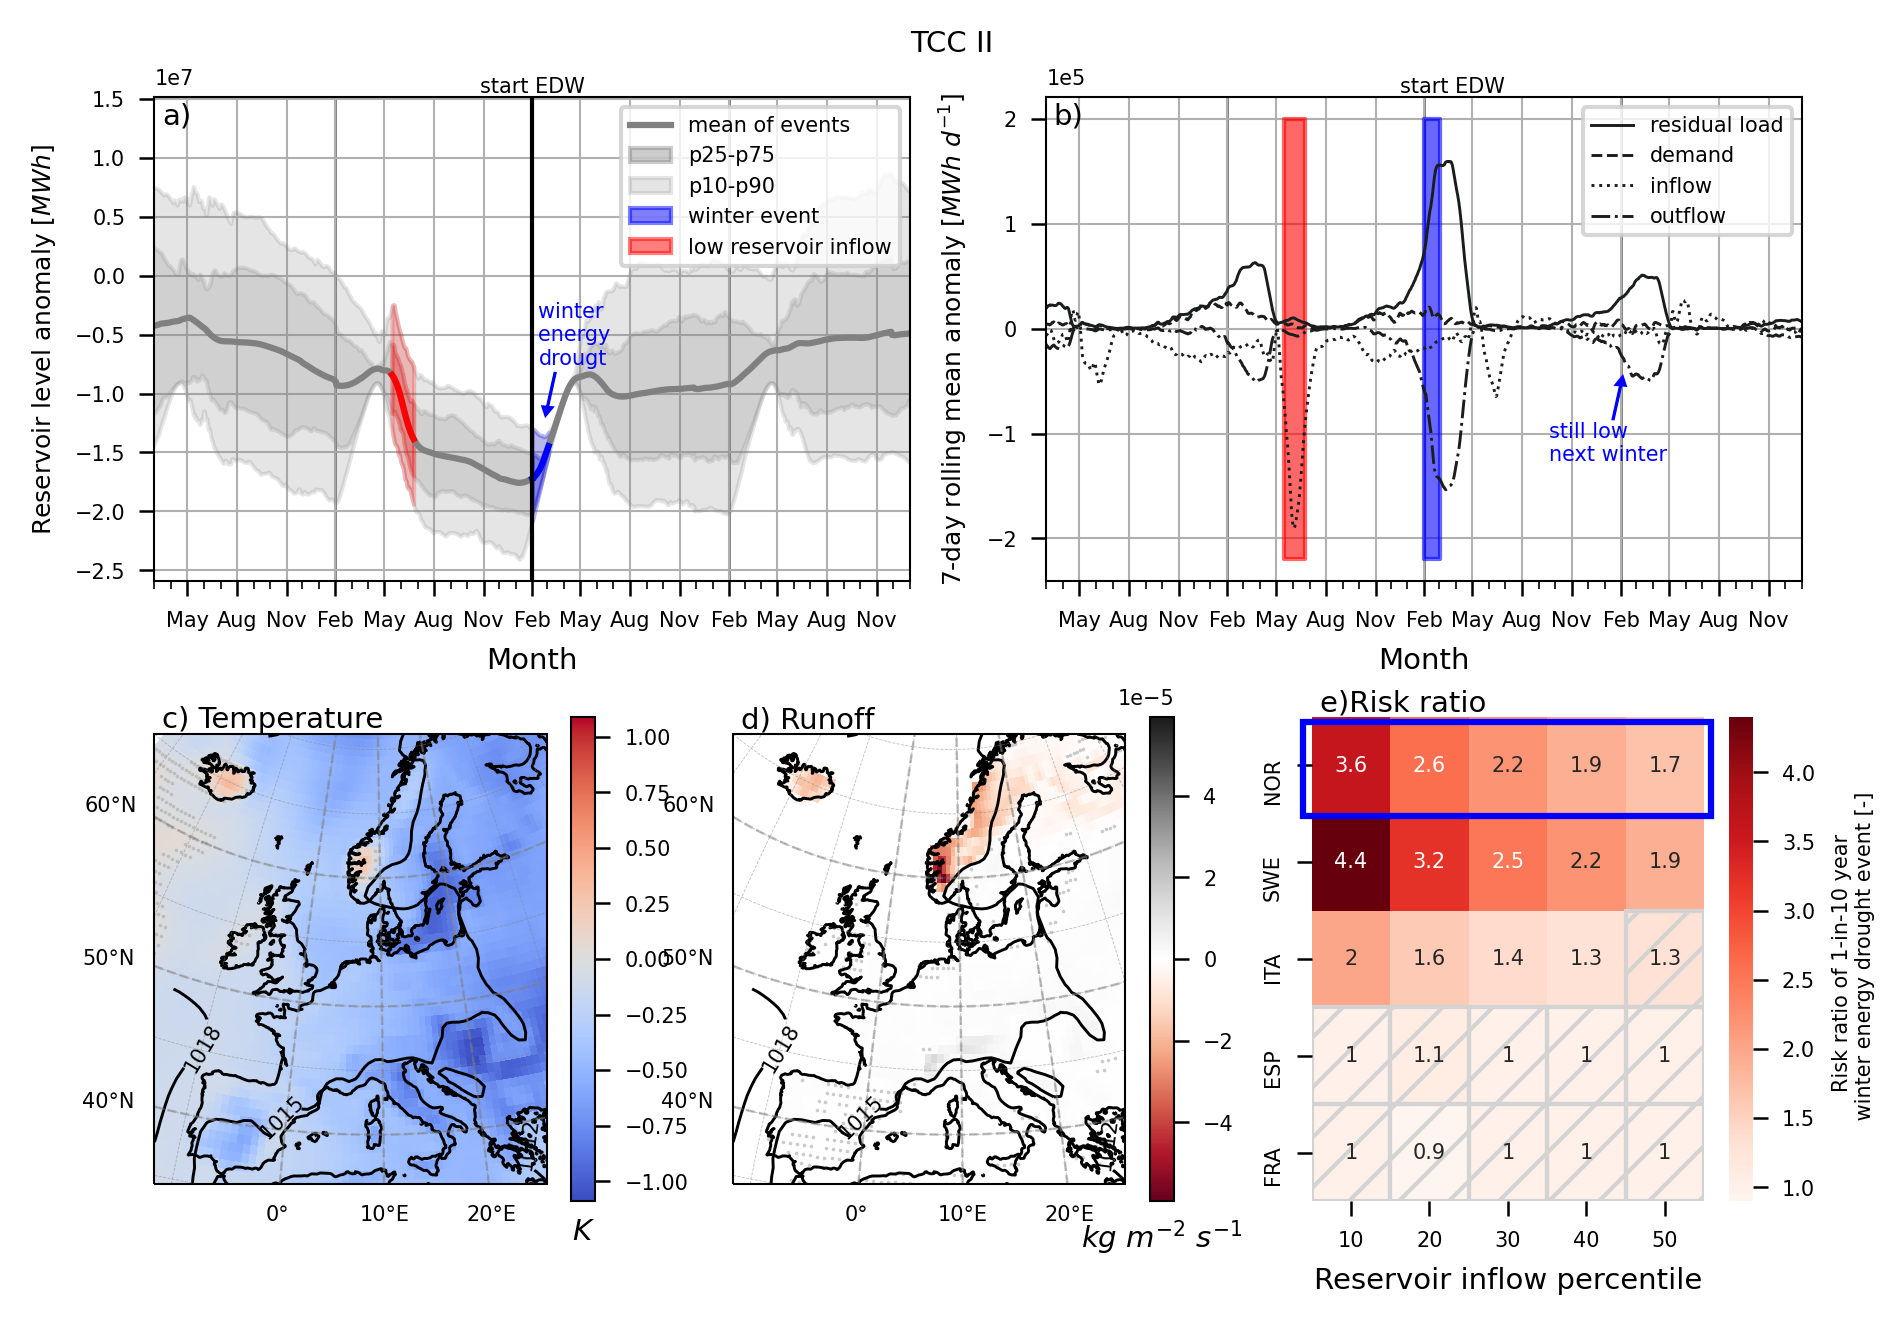

In [5]:
# Define colormap settings for variables
cmaps = {'tas': 'coolwarm', 'mrro': 'RdGy'}

# Define contour levels for plotting
levelsp = np.arange(990, 1030, 2.5)

# Plot country border
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shapereader.natural_earth(resolution, category, name)
df = gpd.read_file(shpfilename)

# Define figure size in millimeters and convert to inches
width_mm = 180
height_mm = (9.5 / 15) * 180
width_in = width_mm / 25.4
height_in = height_mm / 25.4

# Create figure and subplot grid
fig = plt.figure(figsize=(width_in, height_in), dpi=300)
fig.suptitle('TCC II', fontsize=7)  # Add a title to the figure

# Define subplots layout
ax0 = fig.add_subplot(2, 2, 1)
ax01 = fig.add_subplot(2, 2, 2)
ax1 = fig.add_subplot(2, 3, 4, projection=ccrs.EuroPP())
ax2 = fig.add_subplot(2, 3, 5, projection=ccrs.EuroPP())
ax3 = fig.add_subplot(2, 3, 6)

country = 'NOR'  # Define the country for data analysis

# Labels and styles for different data series
labels = ['residual load', 'demand', 'inflow', 'outflow']
ls = ['solid', 'dashed', 'dotted', 'dashdot']
handles_list = []
labels_list = []

# Loop through each subplot and plot the data series
for i, (a, d) in enumerate(zip((ax0, ax01, ax01, ax01, ax01), (data, resdata, demdata, Eindata, Eoutdata))):
    dft2 = d
    dft2['date_idx'] = np.arange(0, len(dft2)) - extension  # Create a date index for the dataset
    dft2 = dft2.set_index('date_idx')  # Set the date index
    dft2 = dft2.rolling(7).mean().shift(-3)  # Apply a rolling mean and shift for smoothing
    co = 'grey'
    dft2.mean(axis=1).plot(legend=False, ax=a, label=labels[i - 1], linestyle=ls[i - 1], color='#1b1c1c', alpha=1, linewidth=0.7)
    
    # Specific settings and overlays for the first subplot (ax0)
    if a == ax0:
        co = 'grey'
        dft2.mean(axis=1).plot(legend=False, ax=a, color=co)
        handles_list.append(mlines.Line2D([], [], color='grey', label='mean of events'))
        labels_list.append('mean of events')
        
        a.fill_between(dft2.index, dft2.quantile(0.75, axis=1), dft2.quantile(0.25, axis=1), color=co, alpha=0.2)
        fill1_handle = mpatches.Patch(color='grey', alpha=0.4)
        handles_list.append(fill1_handle)
        labels_list.append('p25-p75')
        
        a.fill_between(dft2.index, dft2.quantile(0.9, axis=1), dft2.quantile(0.1, axis=1), color=co, alpha=0.2)
        fill2_handle = mpatches.Patch(color='grey', alpha=0.2)
        handles_list.append(fill2_handle)
        labels_list.append('p10-p90')
        
        co = colors_seasons['winter']
        dft3 = dft2.loc[0:30]
        dft3.mean(axis=1).plot(legend=False, ax=a, color=co)
        a.fill_between(dft3.index, dft3.quantile(0.75, axis=1), dft3.quantile(0.25, axis=1), color=co, alpha=0.2)
        a.fill_between(dft3.index, dft3.quantile(0.9, axis=1), dft3.quantile(0.1, axis=1), color=co, alpha=0.2)

        fill2_handle = mpatches.Patch(color=co, alpha=0.5)
        handles_list.append(fill2_handle)
        labels_list.append('winter event')
        
        co = 'red'
        dft3 = dft2.loc[pois[country][0]:pois[country][1]]
        dft3.mean(axis=1).plot(legend=False, ax=a, color=co)
        a.fill_between(dft3.index, dft3.quantile(0.75, axis=1), dft3.quantile(0.25, axis=1), color=co, alpha=0.2)
        a.fill_between(dft3.index, dft3.quantile(0.9, axis=1), dft3.quantile(0.1, axis=1), color=co, alpha=0.2)
        
        fill2_handle = mpatches.Patch(color=co, alpha=0.5)
        handles_list.append(fill2_handle)
        labels_list.append('low reservoir inflow')
    else:
        co = 'red'
        a.fill_between([pois[country][0], pois[country][1]], -220000, 200000, color=co, alpha=0.2)
        co = colors_seasons['winter']
        a.fill_between([0, 30], -220000, 200000, color=co, alpha=0.2)

    a.set_ylabel('7-day rolling mean anomaly [$MWh$ $d^{-1}$]', fontsize=6)
    a.set_xlabel('Month')
    a.set_axisbelow(True)
    a.grid()

# Remove duplicate handles and labels
unique_handles_labels = dict(zip(labels_list, handles_list))
unique_handles = list(unique_handles_labels.values())
unique_labels = list(unique_handles_labels.keys())

# Create the legend
ax0.legend(unique_handles, unique_labels, fontsize=5)
ax01.legend()

# Set monthly ticks for x-axis
mls = [monthrange(2005, i)[1] for i in range(1, 13)]
mnms = [calendar.month_abbr[i] for i in range(1, 13)]
pos = np.cumsum([0] + mls + mls + mls)
neg = np.cumsum([-x for x in mls] + [-x for x in mls] + [-x for x in mls])[::-1]
ticks = np.concatenate([neg, pos])[:-1]
ticks = ticks - 31  # Adjust ticks for February start
names = mnms + mnms + mnms + mnms + mnms + mnms

ax0.set_xticks(ticks, minor=True)
ax0.set_xticks(ticks[1::3])
ax0.set_xticklabels(names[1::3])
ax0.set_xlim(-700, 700)
ax0.set_axisbelow(True)

# Set yearly lines on the x-axis
for y in [-2, -1, 0, 1, 2, 3]:
    ax0.axvline(y * 365, color='grey', linewidth=0.7, zorder=-1)

ax0.set_xlabel('Month')
ax0.set_ylabel('Reservoir level anomaly [$MWh$]')

# Add start EDW line and text
ax0.text(0.50, 1, 'start EDW', horizontalalignment='center', verticalalignment='bottom', transform=ax0.transAxes, color='black')
ax0.axvline(0, color='black', linewidth=1)

# Add winter event text
ax0.text(0.508, 0.44, 'winter \nenergy \ndrougt', horizontalalignment='left', verticalalignment='bottom', transform=ax0.transAxes, color=colors_seasons['winter'])

# Apply similar settings to ax01
ax01.set_xticks(ticks, minor=True)
ax01.set_xticks(ticks[1::3])
ax01.set_xticklabels(names[1::3])
ax01.set_axisbelow(True)

for y in [-2, -1, 0, 1, 2]:
    ax01.axvline(y * 365, color='grey', linewidth=0.7, zorder=-1)

ax01.set_xlim((-700, 700))
ax01.ticklabel_format(style='sci', scilimits=(-3, 4), axis='y')

ax01.text(0.538, 1, 'start EDW', horizontalalignment='center', verticalalignment='bottom', transform=ax01.transAxes, color='black')

ax01.text(0.665, 0.24, 'still low \nnext winter', horizontalalignment='left', verticalalignment='bottom', transform=ax01.transAxes, color=colors_seasons['winter'])

# Define formatting function for contour labels
def fmt(x):
    s = f"{x:.0f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

# Plot contour lines and temperature anomalies
for ax in [ax1, ax2]:
    CS = ((psl['psl'].sel(lon=slice(-15, 28)) / 100).plot.contour(ax=ax, colors='black', levels=levelsp, add_colorbar=False, add_labels=False, linewidths=0.7, transform=ccrs.PlateCarree()))
    ax.clabel(CS, CS.levels[::1], inline=True, fmt=fmt)

# Plot temperature anomalies
pcm = tas.tas.plot(ax=ax1, cmap=cmaps['tas'], add_colorbar=False, add_labels=False, transform=ccrs.PlateCarree())

# Highlight non-significant grid cells with grey dots
dft = tas.sign.to_dataframe().reset_index()
dft = dft.loc[dft.sign, :]
non_significant_lon = dft.lon.values
non_significant_lat = dft.lat.values
cs = ax1.scatter(non_significant_lon, non_significant_lat, color='darkgrey', s=3, marker='.', edgecolor=None, facecolor=None, transform=ccrs.PlateCarree(), alpha=0.6, lw=0)
ax1.coastlines(resolution='50m', linewidth=0.7)

# Add gridlines and labels
gl0 = ax1.gridlines(draw_labels=False, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl = ax1.gridlines(draw_labels=False, linewidth=0.6, color='gray', alpha=0.5, linestyle='--', x_inline=False)
gl.xlabel_style = {'size': 5, 'rotation': 0}
gl.ylabel_style = {'size': 5, 'rotation': 0}
gl.xlocator = plt.FixedLocator([0, 10, 20])
gl.ylocator = plt.FixedLocator([40, 50, 60])
gl.bottom_labels = True
gl.left_labels = True

cbar = plt.colorbar(pcm, ax=ax1, shrink=1)
cbar.ax.set_xlabel('$K$')
ax1.set_xlabel('Temperature anomalies')

# Plot runoff anomalies
pcm = mrro.mrro.plot(ax=ax2, cmap=cmaps['mrro'], add_colorbar=False, add_labels=False, transform=ccrs.PlateCarree())
# Add gridlines and labels
gl0 = ax2.gridlines(draw_labels=False, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl = ax2.gridlines(draw_labels=False, linewidth=0.6, color='gray', alpha=0.5, linestyle='--', x_inline=False)
gl.xlabel_style = {'size': 5, 'rotation': 0}
gl.ylabel_style = {'size': 5, 'rotation': 0}
gl.xlocator = plt.FixedLocator([0, 10, 20])
gl.ylocator = plt.FixedLocator([40, 50, 60])
gl.bottom_labels = True
gl.left_labels = True

# Highlight non-significant grid cells with grey dots
dft = mrro.sign.to_dataframe().reset_index()
dft = dft.loc[dft.sign, :]
non_significant_lon = dft.lon.values
non_significant_lat = dft.lat.values
cs = ax2.scatter(non_significant_lon, non_significant_lat, color='darkgrey', s=3, marker='.', edgecolor=None, facecolor=None, transform=ccrs.PlateCarree(), alpha=0.6, lw=0)
ax2.coastlines(resolution='50m', linewidth=0.7)

cbar = plt.colorbar(pcm, ax=ax2, shrink=1)
cbar.ax.set_xlabel('$kg$ $m^{-2}$ $s^{-1}$')
ax2.set_xlabel('Runoff anomalies')

# Plot heatmap for risk ratio data
dfhm = dfhm.round(1)
axhm = sns.heatmap(dfhm, annot=True, ax=ax3, cbar_kws={'label': 'Risk ratio of 1-in-10 year \n winter energy drought event [-]'}, cmap='Reds')

# Add statistical significance texture
for y in range(dfSI.shape[0]):
    for x in range(dfSI.shape[1]):
        if dfSI.iloc[y, x]:
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=False, hatch='//', edgecolor='lightgrey'))

axhm.figure.axes[-1].yaxis.label.set_size(5)
axhm.set_xticklabels([10, 20, 30, 40, 50])
axhm.set_xlabel('Reservoir inflow percentile')

# Remove titles from subplots and add labels
for ax in [ax1, ax2, ax3]:
    ax.set_title(' ')

for n, (ax, title) in enumerate(zip([ax0, ax01, ax1, ax2, ax3], ['', '', ' Temperature', ' Runoff', 'Risk ratio'])):
    if ax == ax0:
        ax.text(0.01, 0.99, string.ascii_lowercase[n] + ')' + title, ha='left', va='top', transform=ax.transAxes, size=7)
    elif ax == ax01:
        ax.text(0.01, 0.99, string.ascii_lowercase[n] + ')' + title, ha='left', va='top', transform=ax.transAxes, size=7)
    elif ax == fig.axes[-1]:
        continue
    else:
        ax.text(0.02, 1, string.ascii_lowercase[n] + ')' + title, ha='left', va='bottom', transform=ax.transAxes, size=7)

# Add arrow and text to subplot
ax01.arrow(0.75, 0.335, 0.01, 0.07, head_width=0.013, head_length=0.018, transform=ax01.transAxes, color=colors_seasons['winter'], linewidth=0.6)

# Add rectangle to heatmap
ax = fig.add_subplot(2, 2, 4)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_zorder(1000)
ax.axis('off')
ax.add_patch(Rectangle((0.34, 0.795), 0.54, 0.195, fill=None, alpha=1, transform=ax.transAxes, color=colors_seasons['winter'], linewidth=1.5))

fig.subplots_adjust(hspace=0.28, wspace=0.18)
plt.subplots_adjust(top=0.93)

# Add figures
ax0.arrow(0.53, 0.43, -0.01, -0.07, head_width=0.013, head_length=0.018, transform=ax0.transAxes, color=colors_seasons['winter'], linewidth=0.6)
plt.show()
